<a href="https://colab.research.google.com/github/MayyaraHY/gomycode-etl-graph-dashboard/blob/main/student_subscriptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import subscription file

In [3]:
file_path = '/content/drive/MyDrive/content/Functional Task - OLTP_Subscription.csv'
df_raw = pd.read_csv(file_path)

# Preview the first few rows
df_raw.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,instructor_diploma,StudentBirthDate,professionalExperience,Industry
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2003-07-25,0,Sales
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2001-03-15,1,Research And Development
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2000-06-19,0,Research And Development
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,NaN,NaN,NaN,0,Marketing
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,NaN,NaN,1997-06-04,3,Design


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SessionName             5024 non-null   object
 1   TrackName               5024 non-null   object
 2   Hackerspace             5024 non-null   object
 3   Country                 5024 non-null   object
 4   GroupName               5024 non-null   object
 5   ProductSchedule         5024 non-null   object
 6   Student                 5024 non-null   object
 7   StudentGender           5024 non-null   object
 8   InstructorFullName      5024 non-null   object
 9   InstructorEmail         5024 non-null   object
 10  SubscriptionStartDate   5024 non-null   object
 11  SubscriptionEndDate     5024 non-null   object
 12  SubscriptionProgress    5024 non-null   object
 13  SubscriptionHasDiploma  5024 non-null   bool  
 14  DiplomaDate             3881 non-null   object
 15  inst

#**1. Data cleaning**


*   Date format


In [5]:
# Fix DiplomaDate using European format (day-first)
df_raw['DiplomaDate'] = pd.to_datetime(df_raw['DiplomaDate'], dayfirst=True, errors='coerce')

In [6]:
df_raw.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,instructor_diploma,StudentBirthDate,professionalExperience,Industry
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2003-07-25,0,Sales
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2001-03-15,1,Research And Development
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2000-06-19,0,Research And Development
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,NaT,NaN,NaN,0,Marketing
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,NaT,NaN,1997-06-04,3,Design


In [7]:
date_columns = [
    'SubscriptionStartDate',
    'SubscriptionEndDate',
    'DiplomaDate',
    'StudentBirthDate'
]

for col in date_columns:
    df_raw[col] = pd.to_datetime(df_raw[col], errors='coerce')

# Check for missing values
df_raw.isnull().sum()

,0
SessionName,0
TrackName,0
Hackerspace,0
Country,0
GroupName,0
ProductSchedule,0
Student,0
StudentGender,0
InstructorFullName,0
InstructorEmail,0




* fill missing values



In [8]:
# Fill missing birthdates with the most common one
most_common_birthdate = df_raw['StudentBirthDate'].mode()[0]
print(most_common_birthdate)
df_raw['StudentBirthDate'] = df_raw['StudentBirthDate'].fillna(most_common_birthdate)

1999-08-12 00:00:00


In [9]:
# check
df_raw['StudentBirthDate'].isna().sum()

np.int64(0)

In [10]:
# Fill missing diploma dates with the mode
most_common_diploma_date = df_raw['DiplomaDate'].mode()[0]
df_raw['DiplomaDate'] = df_raw['DiplomaDate'].fillna(most_common_diploma_date)
print(most_common_diploma_date)
df_raw['DiplomaDate'].isna().sum()

2024-10-06 00:00:00


np.int64(0)



*   Drop instructor diploma column



In [11]:
df_raw = df_raw.drop(columns=['instructor_diploma'])

Check for missing values

In [12]:
df_raw.isnull().sum()

,0
SessionName,0
TrackName,0
Hackerspace,0
Country,0
GroupName,0
ProductSchedule,0
Student,0
StudentGender,0
InstructorFullName,0
InstructorEmail,0


# Calculate age at subscription

In [13]:
df_raw['age_at_subscription'] = (
    df_raw['SubscriptionStartDate'] - df_raw['StudentBirthDate']
).dt.days // 365

In [14]:
df_raw.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,StudentBirthDate,professionalExperience,Industry,age_at_subscription
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2003-07-25,0,Sales,20
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2001-03-15,1,Research And Development,22
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2000-06-19,0,Research And Development,23
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,2024-10-06,1999-08-12,0,Marketing,24
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,2024-10-06,1997-06-04,3,Design,26


Save data set after cleaning

In [15]:
df_cleaned = df_raw.copy()
df_cleaned.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,StudentBirthDate,professionalExperience,Industry,age_at_subscription
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2003-07-25,0,Sales,20
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2001-03-15,1,Research And Development,22
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2024-11-02,2000-06-19,0,Research And Development,23
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,2024-10-06,1999-08-12,0,Marketing,24
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,2024-10-06,1997-06-04,3,Design,26


#**2. Create OLAP Features**


*   Subscription trend analysis






In [16]:
#subscriptions per month and year
df_cleaned['subscription_month'] = df_cleaned['SubscriptionStartDate'].dt.to_period('M').astype(str)
#df_cleaned.head()

In [17]:
#count sybscriptions per month
subscription_trends = df_cleaned.groupby('subscription_month').agg(
    total_subscriptions=('Student', 'count')
).reset_index()
print(subscription_trends)

  subscription_month  total_subscriptions
0            2024-01                  859
1            2024-02                  142
2            2024-03                  742
3            2024-04                  529
4            2024-05                  521
5            2024-06                  730
6            2024-07                  816
7            2024-08                  650
8            2024-09                   35



*   Preview data


In [18]:
# Convert to datetime for sorting if not already
subscription_trends['subscription_month'] = pd.to_datetime(subscription_trends['subscription_month'])

# Sort by month again just to be safe
subscription_trends = subscription_trends.sort_values('subscription_month')

# Calculate percentage change
subscription_trends['growth_percent'] = subscription_trends['total_subscriptions'].pct_change() * 100

# Convert month back to string format for display
subscription_trends['subscription_month'] = subscription_trends['subscription_month'].dt.to_period('M').astype(str)

# Round for readability
subscription_trends['growth_percent'] = subscription_trends['growth_percent'].round(2)

subscription_trends.head()


,subscription_month,total_subscriptions,growth_percent
0,2024-01,859,NaN
1,2024-02,142,-83.47
2,2024-03,742,422.54
3,2024-04,529,-28.71
4,2024-05,521,-1.51


In [19]:
# Peak month
peak_row = subscription_trends.loc[subscription_trends['total_subscriptions'].idxmax()]

# Drop month
drop_row = subscription_trends.loc[subscription_trends['total_subscriptions'].idxmin()]

print(f"📈 Peak Month: {peak_row['subscription_month']} with {peak_row['total_subscriptions']} subscriptions")
print(f"📉 Lowest Month: {drop_row['subscription_month']} with {drop_row['total_subscriptions']} subscriptions")


📈 Peak Month: 2024-01 with 859 subscriptions
📉 Lowest Month: 2024-09 with 35 subscriptions


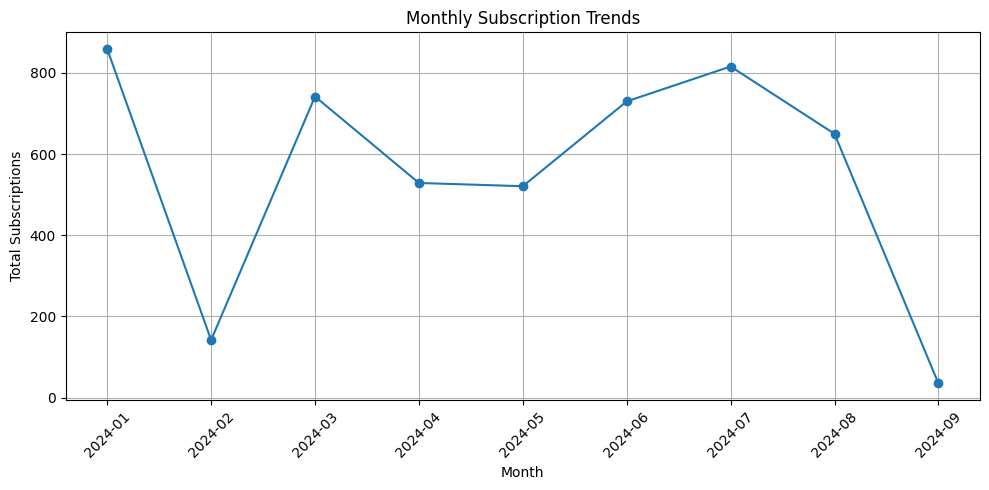

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(subscription_trends['subscription_month'], subscription_trends['total_subscriptions'], marker='o')
plt.title('Monthly Subscription Trends')
plt.xlabel('Month')
plt.ylabel('Total Subscriptions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



*   Move on to churn tracking or cohort analysis





In [21]:
#extract end date w/ month
df_cleaned['subscription_end_month'] = df_cleaned['SubscriptionEndDate'].dt.to_period('M').astype(str)


In [22]:
churn_trends = df_cleaned.groupby('subscription_end_month').agg(
    ended_subscriptions=('Student', 'count')
).reset_index()
print(churn_trends)

  subscription_end_month  ended_subscriptions
0                2024-01                    3
1                2024-02                   14
2                2024-03                   53
3                2024-04                  313
4                2024-05                  223
5                2024-06                  653
6                2024-07                 1489
7                2024-08                  993
8                2024-09                  704
9                2024-10                  579




*   Compare the end data with the start data



In [23]:
# Rename for clarity before merging
subscription_trends.rename(columns={'subscription_month': 'month', 'total_subscriptions': 'started_subscriptions'}, inplace=True)
churn_trends.rename(columns={'subscription_end_month': 'month'}, inplace=True)

# Merge both
subscription_churn = pd.merge(subscription_trends, churn_trends, on='month', how='outer').fillna(0)
subscription_churn['started_subscriptions'] = subscription_churn['started_subscriptions'].astype(int)
subscription_churn['ended_subscriptions'] = subscription_churn['ended_subscriptions'].astype(int)

In [24]:
subscription_churn['churn_rate'] = (
    subscription_churn['ended_subscriptions'] / subscription_churn['started_subscriptions']
) * 100

subscription_churn['churn_rate'] = subscription_churn['churn_rate'].replace([float('inf'), -float('inf')], 0)
subscription_churn['churn_rate'] = subscription_churn['churn_rate'].round(2)


In [25]:
#perview
subscription_churn.head()

,month,started_subscriptions,growth_percent,ended_subscriptions,churn_rate
0,2024-01,859,0.00,3,0.35
1,2024-02,142,-83.47,14,9.86
2,2024-03,742,422.54,53,7.14
3,2024-04,529,-28.71,313,59.17
4,2024-05,521,-1.51,223,42.80


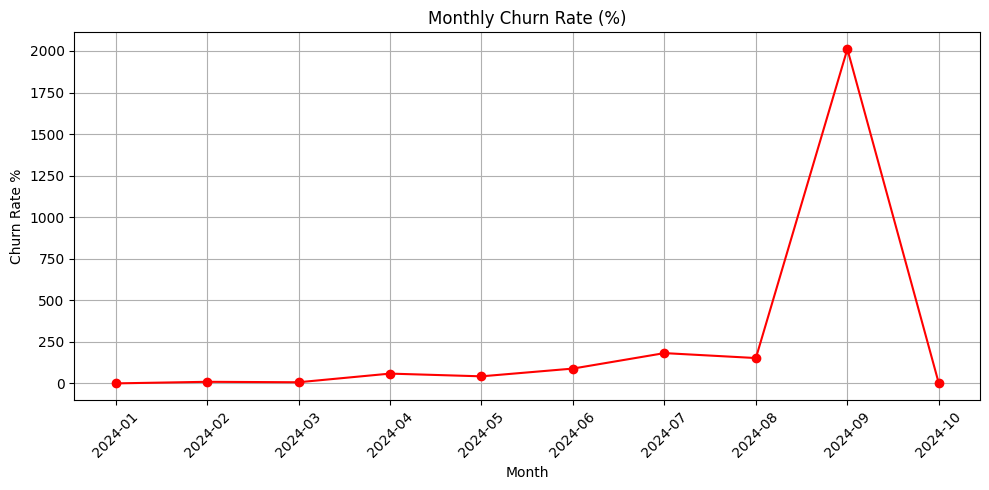

In [26]:
#visulize data
plt.figure(figsize=(10, 5))
plt.plot(subscription_churn['month'], subscription_churn['churn_rate'], marker='o', color='red')
plt.title('Monthly Churn Rate (%)')
plt.xlabel('Month')
plt.ylabel('Churn Rate %')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


*   cohort analysis


In [27]:
#active months
df_cleaned['subscription_start_month'] = df_cleaned['SubscriptionStartDate'].dt.to_period('M')
df_cleaned['subscription_end_month'] = df_cleaned['SubscriptionEndDate'].dt.to_period('M')
df_cleaned.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,...,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,StudentBirthDate,professionalExperience,Industry,age_at_subscription,subscription_month,subscription_end_month,subscription_start_month
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,...,100.00%,True,2024-11-02,2003-07-25,0,Sales,20,2024-01,2024-01,2024-01
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,...,100.00%,True,2024-11-02,2001-03-15,1,Research And Development,22,2024-01,2024-01,2024-01
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,...,100.00%,True,2024-11-02,2000-06-19,0,Research And Development,23,2024-01,2024-01,2024-01
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,...,0.00%,False,2024-10-06,1999-08-12,0,Marketing,24,2024-02,2024-02,2024-02
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,...,26.61%,False,2024-10-06,1997-06-04,3,Design,26,2024-02,2024-02,2024-02


In [28]:
df_cleaned.dtypes


,0
SessionName,object
TrackName,object
Hackerspace,object
Country,object
GroupName,object
ProductSchedule,object
Student,object
StudentGender,object
InstructorFullName,object
InstructorEmail,object


In [29]:
# Months since cohort start
df_cleaned['cohort_index'] = (
    (df_cleaned['subscription_end_month'] - df_cleaned['subscription_start_month']).apply(lambda x: x.n)
)

In [30]:
#group by cohort and period
cohort_data = (
    df_cleaned.groupby(['subscription_start_month', 'cohort_index'])
    .agg(n_students=('Student', 'nunique'))
    .reset_index()
)
print(cohort_data)

   subscription_start_month  cohort_index  n_students
0                   2024-01             0           3
1                   2024-01             1           8
2                   2024-01             2          49
3                   2024-01             3         268
4                   2024-01             4           6
5                   2024-01             5         254
6                   2024-01             6         228
7                   2024-01             7          24
8                   2024-01             9          15
9                   2024-02             0           6
10                  2024-02             1           3
11                  2024-02             2          11
12                  2024-02             3           7
13                  2024-02             4          42
14                  2024-02             5          49
15                  2024-02             6          20
16                  2024-02             7           4
17                  2024-03 

In [31]:
cohort_pivot = cohort_data.pivot(index='subscription_start_month', columns='cohort_index', values='n_students')
cohort_pivot.fillna(0, inplace=True)
cohort_pivot = cohort_pivot.astype(int)
cohort_pivot


cohort_index,0,1,2,3,4,5,6,7,9
subscription_start_month,,,,,,,,,
2024-01,3,8,49,268,6,254,228,24,15
2024-02,6,3,11,7,42,49,20,4,0
2024-03,1,32,179,15,281,176,49,5,0
2024-04,0,29,35,100,32,232,100,0,0
2024-05,1,28,116,25,178,172,0,0,0
2024-06,275,20,167,86,179,0,0,0,0
2024-07,687,37,71,17,0,0,0,0,0
2024-08,508,55,83,0,0,0,0,0,0
2024-09,29,6,0,0,0,0,0,0,0


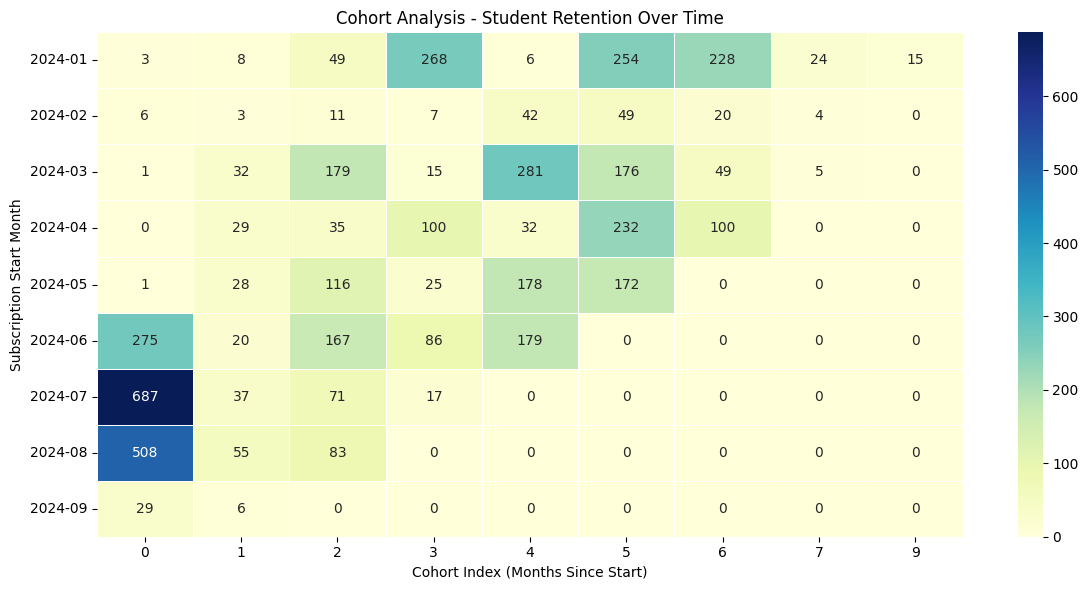

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

plt.title("Cohort Analysis - Student Retention Over Time")
plt.xlabel("Cohort Index (Months Since Start)")
plt.ylabel("Subscription Start Month")
plt.tight_layout()
plt.show()




* COHORT ANALYSIS BY COUNTRY



In [37]:
#calculate cohort index
df_cleaned['cohort_index'] = (
    df_cleaned['subscription_end_month'] - df_cleaned['subscription_start_month']
).apply(lambda x: x.n)

#group by country and cohort index
grouped = (
    df_cleaned
    .groupby(['Country', 'subscription_start_month', 'cohort_index'])
    .agg(n_students=('Student', 'count'))
    .reset_index()
)

#create a matrix
cohort_matrix_country = grouped.pivot_table(
    index='Country',
    columns='cohort_index',
    values='n_students',
    fill_value=0
)
cohort_matrix_country

cohort_index,0,1,2,3,4,5,6,7,9
Country,,,,,,,,,
Algeria,34.0,8.000000,7.666667,7.333333,3.0,17.666667,8.000000,4.0,0.0
Côte d'Ivoire,0.0,8.333333,22.333333,12.600000,13.6,16.750000,19.000000,0.0,0.0
Egypt,0.0,4.400000,3.600000,9.000000,8.0,5.333333,13.000000,0.0,0.0
Kenya,1.0,0.000000,4.000000,4.000000,5.0,17.333333,10.000000,2.0,0.0
Morocco,5.2,3.000000,11.142857,10.250000,9.0,18.333333,6.000000,0.0,0.0
Nigeria,6.5,7.428571,17.666667,16.600000,60.6,93.500000,59.666667,0.0,0.0
Senegal,28.0,0.000000,23.428571,32.750000,27.0,17.800000,14.500000,0.0,15.0
Tunisia,429.0,14.833333,23.125000,21.000000,28.8,36.000000,29.250000,13.5,0.0


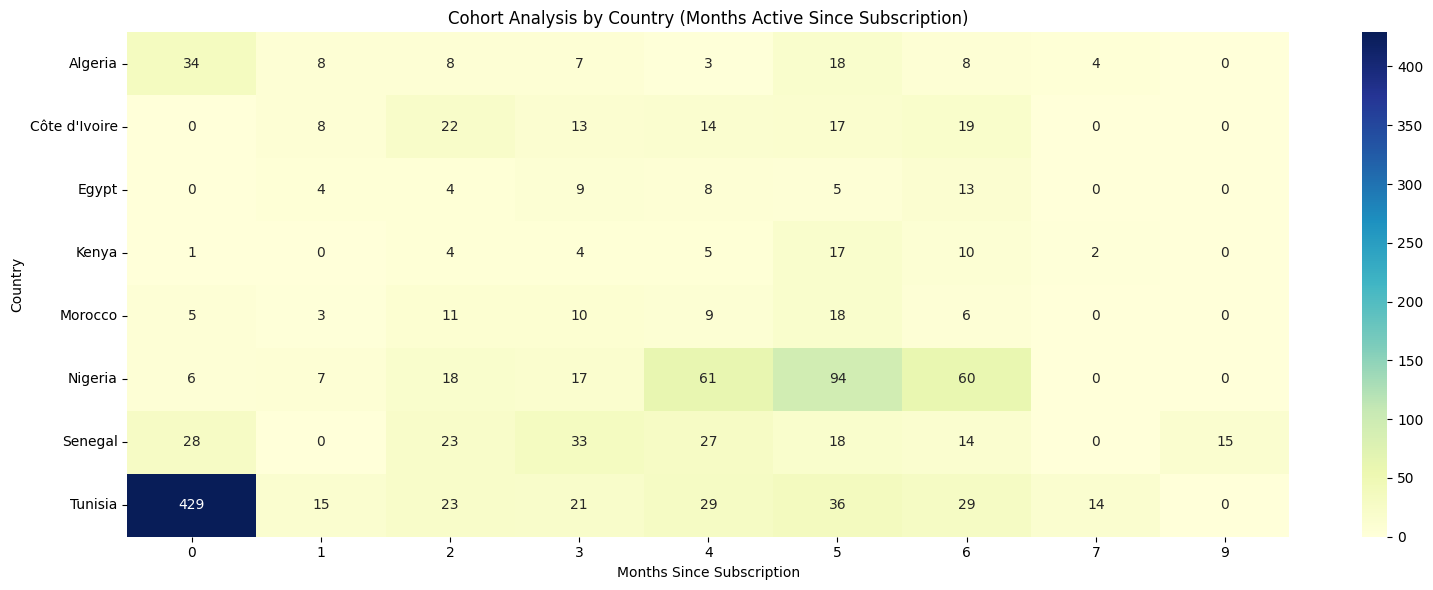

In [40]:
plt.figure(figsize=(16, 6))
sns.heatmap(cohort_matrix_country, cmap='YlGnBu', annot=True,  fmt='.0f')
plt.title('Cohort Analysis by Country (Months Active Since Subscription)')
plt.xlabel('Months Since Subscription')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

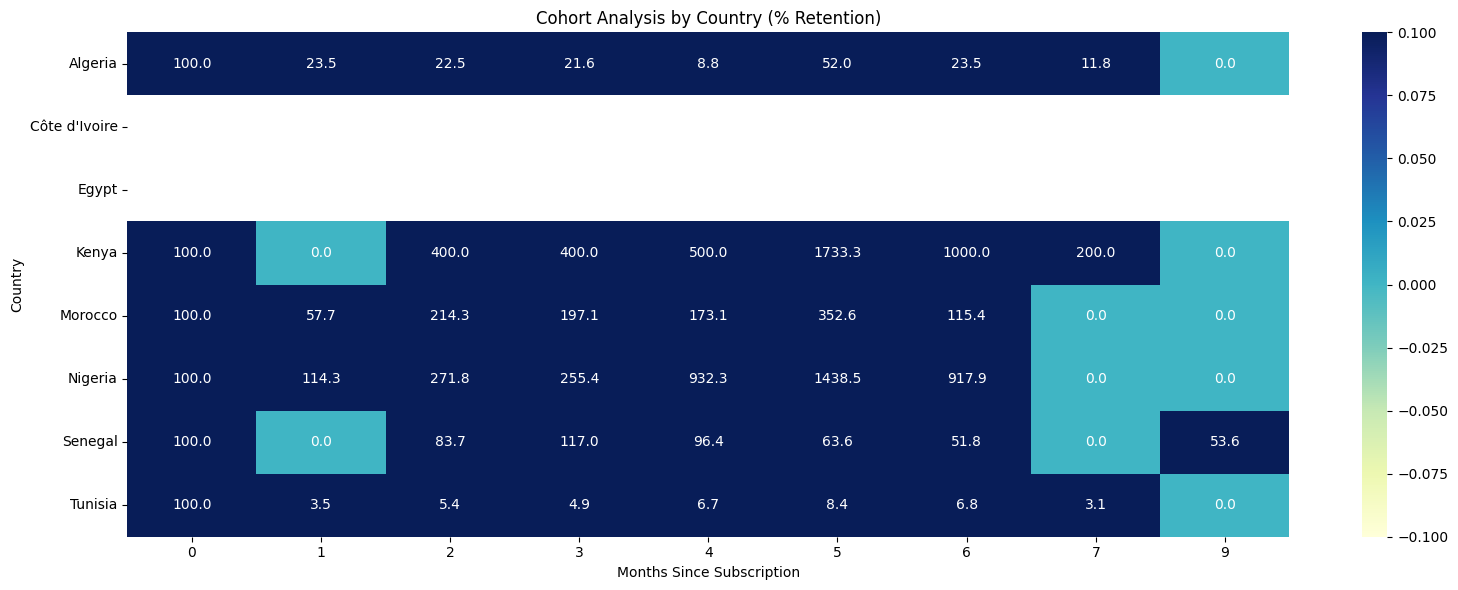

In [46]:
#visulize retention rate

retention_matrix = cohort_matrix_country.divide(cohort_matrix_country[0], axis=0) * 100

plt.figure(figsize=(16, 6))
sns.heatmap(retention_matrix, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Cohort Analysis by Country (% Retention)')
plt.xlabel('Months Since Subscription')
plt.ylabel('Country')
plt.tight_layout()
plt.show()